# Data Madness
# How VAR influenced the 2019-20 Premier League Season

Video Assisted Referee (VAR) was introduced in the Premier League for the 2019-20 season and brought with it its load of controversies. The aim of this project is to analyse the impact of VAR on its introduction season. The research questions are the following:

## 1. What type of incidents was VAR most used for?

## 2. Is there a gap between the number of overturned decisions for and against each team? 

## 3. Is the number of disallowed goals significant? Would the season have been different if these goals were not disallowed?

To answer them, two datasets are used: VAR_Incidents_Stats, that describes the types of incidents the VAR was used for, and VAR_Team_Stats, that describes the number of overturned decisions per team and how did these decisions affect the game.
For information, this is the final Premier League Table.

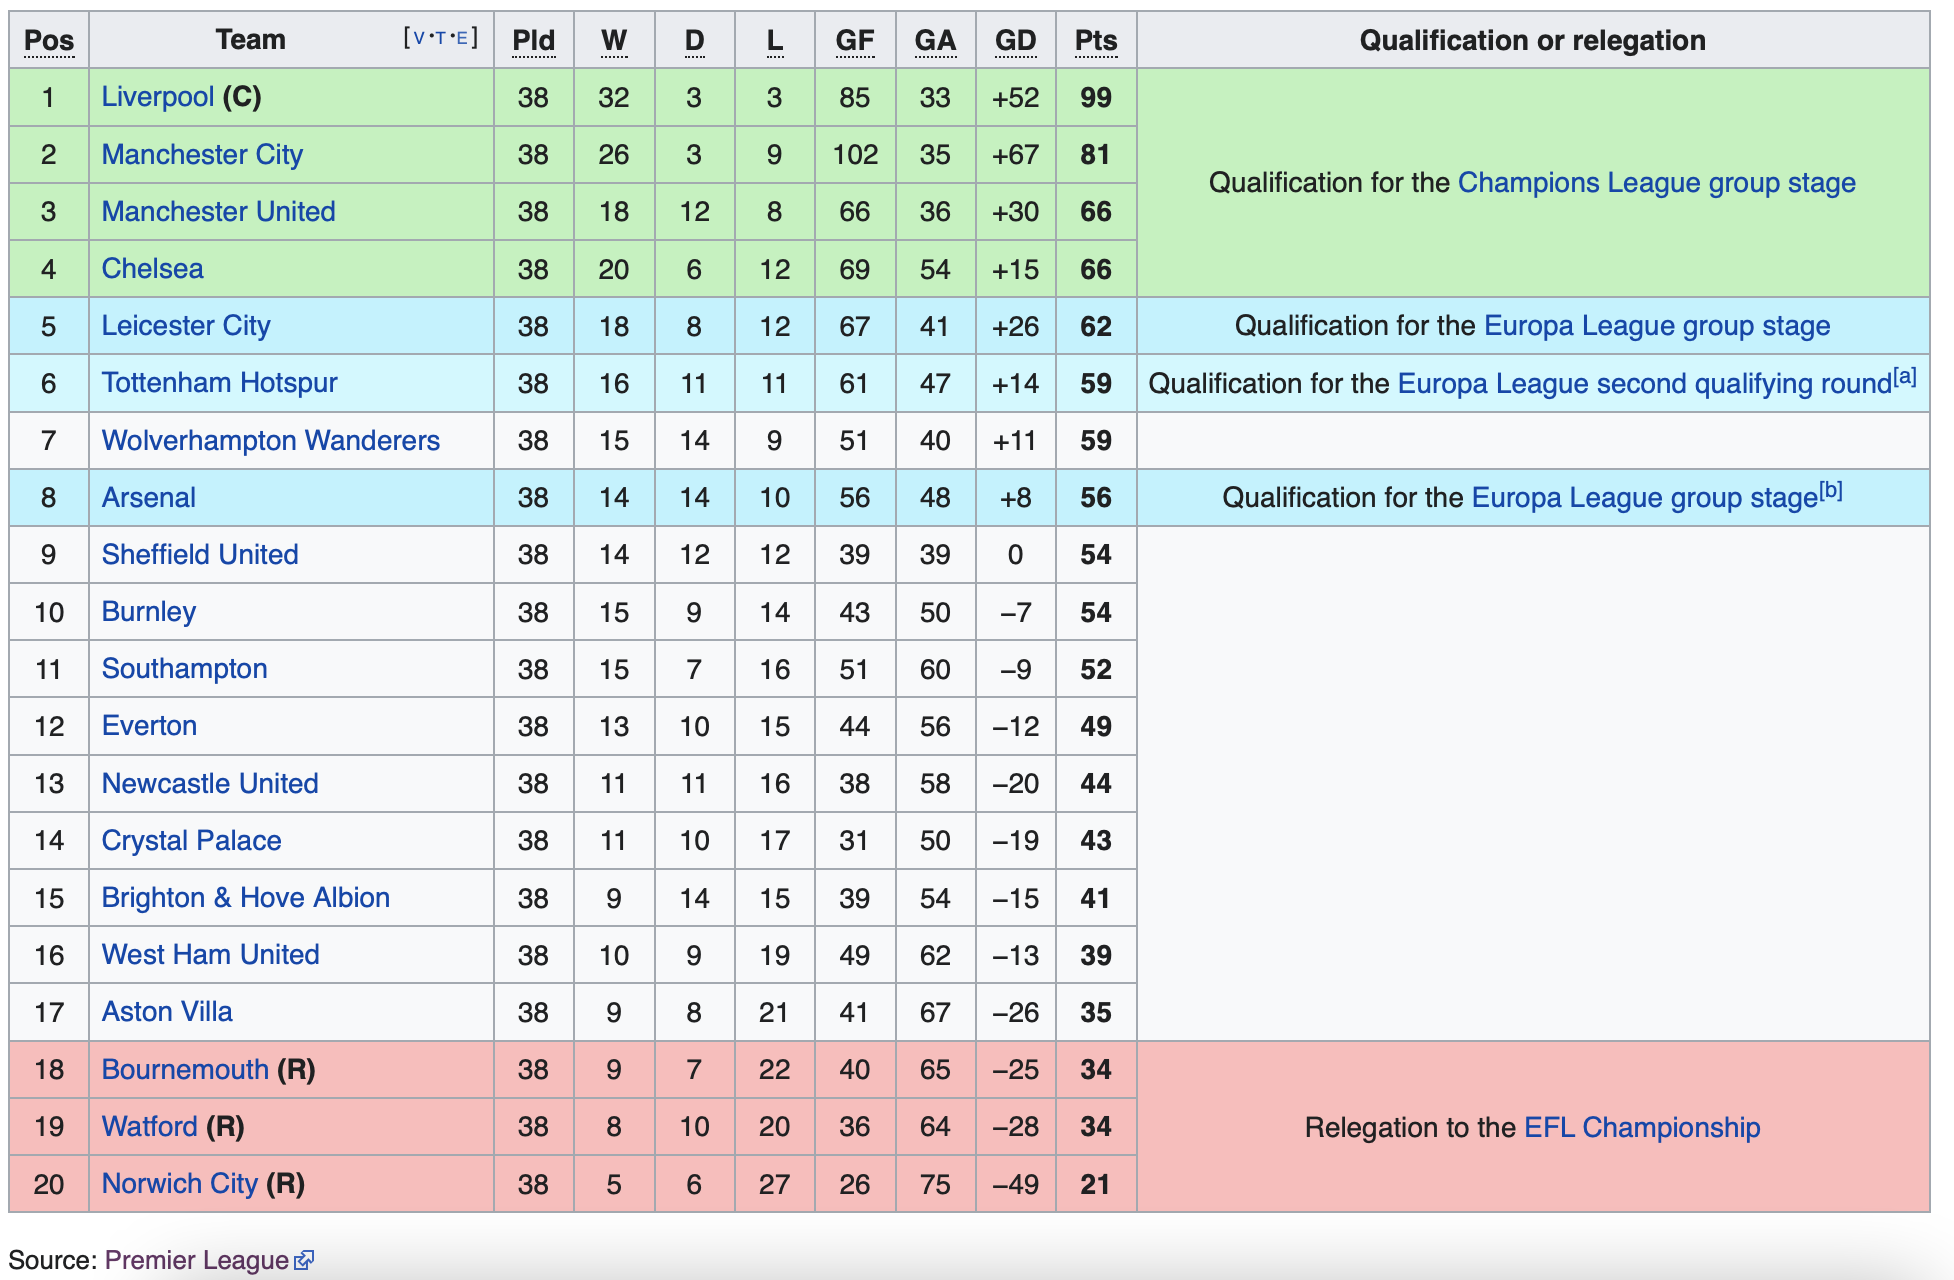

In [1]:
from IPython import display 
display.Image("Table.png")

The season's winner was Liverpool, followed by Manchester City, Manchester United and Chelsea, who were all qualified for the 2020-2021 Champions League. Leicester and Tottenham were qualified for the Europa League thanks to their rankings, while Arsenal was qualified for the competition after winning the 2019-20 FA Cup. Therefore, Arsenal's final ranking did not affect their Europa League Qualification. Finally, Bournemouth, Watford and Norwich City were relegated to the EFL Championship.

Let's start this analysis by loading the datasets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
incidents_raw = pd.read_csv ('VAR_Incidents_Stats.csv')
incidents_raw

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
0,Brighton & Hove Albion,West Ham,Aug. 17,H,Brighton goal for Leandro Trossard ruled out f...,27th minute,AGAINST
1,Brighton & Hove Albion,Aston Villa,Oct. 19,A,Conor Hourihane goal ruled out for a foul by W...,42nd minute,FOR
2,Brighton & Hove Albion,Everton,Oct. 26,H,Penalty awarded (scored by Neil Maupay) for fo...,78th minute,FOR
3,Brighton & Hove Albion,Leicester,Nov. 23,H,Jamie Vardy penalty retaken after James Maddis...,80th minute,FOR
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,David Luiz goal disallowed for offside,63rd minute,FOR
...,...,...,...,...,...,...,...
213,Norwich City,Crystal Palace,Jan. 1,H,Connor Wickham goal awarded after originally b...,85th minute,AGAINST
214,Norwich City,Bournemouth,Jan. 18,H,Red card for Ben Godfrey for foul on Callum Wi...,76th minute,AGAINST
215,Norwich City,Leicester,Feb. 28,H,Goal for Kelechi Iheanacho disallowed for hand...,49th minute,FOR
216,Norwich City,Burnley,July 18,H,Red card for Emiliano Buendia for an elbow on ...,33rd minute,AGAINST


By looking closely at this table, we realise that all the values are entered twice. Indeed, each incident is entered once for Team A as the "Team" and Team B as the "Opponent team" and once for Team B as "Team" and Team A as "Opponent Team", meaning that each incident is counted once as "FOR" a team and once "AGAINST" it. 
The table should therefore be cleaned so each incident is only counted once. To clean it, we delete all rows representing an incident against a team.

In [4]:
incidents = incidents_raw[incidents_raw['VAR used'].str.contains("FOR")]
incidents

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
1,Brighton & Hove Albion,Aston Villa,Oct. 19,A,Conor Hourihane goal ruled out for a foul by W...,42nd minute,FOR
2,Brighton & Hove Albion,Everton,Oct. 26,H,Penalty awarded (scored by Neil Maupay) for fo...,78th minute,FOR
3,Brighton & Hove Albion,Leicester,Nov. 23,H,Jamie Vardy penalty retaken after James Maddis...,80th minute,FOR
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,David Luiz goal disallowed for offside,63rd minute,FOR
5,Brighton & Hove Albion,Sheffield United,Dec. 21,H,John Egan goal ruled out for handball,8th minute,FOR
...,...,...,...,...,...,...,...
197,Sheffield United,Tottenham,July 2,H,Goal for Harry Kane ruled out for handball in ...,32nd minute,FOR
204,Wolves,Watford,Jan. 1,A,Christian Kabasele sent off for professional f...,68th minute,FOR
205,Wolves,Southampton,Jan. 18,A,Penalty awarded (scored by Raul Jimenez) for f...,65th minute,FOR
207,Norwich City,Chelsea,Aug. 24,H,Chelsea goal for Kurt Zouma disallowed for a f...,77th minute,FOR


We now have the table that will be used for the rest of the analysis. As said by ESPN.com, which collected all the data, VAR has been used 109 times. This corresponds to the amount of rows in our table.

In [5]:
teams = pd.read_csv ('VAR_Team_Stats.csv')
teams

,Team,Overturns,Leading to goals for,Disallowed goals for,Leading to goals against,Disallowed goals against,Net goal score,Subjective decisions for,Subjective decisions against,Net subjective score
0,Brighton & Hove Albion,12,2,2,0,7,7,2,0,2
1,Manchester United,13,1,0,2,7,6,6,2,4
2,Crystal Palace,12,3,4,0,1,2,6,2,4
3,Burnley,11,2,3,1,4,2,4,2,2
4,Newcastle,3,1,0,0,0,1,2,0,2
5,Southampton,13,0,0,1,7,6,1,4,-3
6,Liverpool,8,1,3,0,4,2,1,1,0
7,Leicester City,15,1,3,1,4,1,3,3,0
8,Tottenham Hotspur,15,1,4,1,6,2,3,3,0
9,Manchester City,16,3,4,2,2,-1,4,4,0


# 1. What type of incidents was VAR most used for?
This question will be answered using the first dataset (i.e. VAR_Incidents_Stats). The dataset will first be cleaned in order to keep only the relevant information. Afterwards, a string search in the "Incident" column will be executed, followed by a frequency analysis to determine the frequency of each incident type.

We will be working in the "Incident" column. The first step is to convert all characters in it into lowercase characters, so the algorithm matches "Penalty" and "penalty", etc...

In [6]:
# We put all characters in lowercase using a lambda function
incidents['Incident'] = incidents['Incident'].map(lambda x: x.lower())
#incidents

<ipython-input-6-5043ad4228ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['Incident'] = incidents['Incident'].map(lambda x: x.lower())


A string search will now be executed to determine the most frequent types of incidents reviewed by VAR. The incidents are separated in 7 different categories:
1. A goal ruled out for offside
2. A goal ruled out for a foul (by the attacking team)
3. A goal ruled out for a handball (by the attacking team)
4. A penalty that needs to be retaken
5. A goal allowed after being disallowed by the referees
6. A penalty awarded
7. A penalty cancelled 

## A) Goals ruled out for offside

In [7]:
#Displays incidents that contain the words "ruled out" and "offside".
#In order to avoid having the goals that have been awarded after being ruled out for offside,
#these incidents don't contain the word "originally".
offside = incidents[incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("offside")&~incidents['Incident'].str.contains("awarded")&~incidents['Incident'].str.contains("originally")]
offside

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
7,Brighton & Hove Albion,Tottenham,Dec. 26,A,harry kane goal ruled out for offside,24th minute,FOR
11,Brighton & Hove Albion,Burnley,July 26,A,jay rodriguez goal ruled out for offside again...,57th minute,FOR
37,Burnley,Aston Villa,Sept. 28,A,goal for villa's john mcginn ruled out on revi...,25th minute,FOR
42,Burnley,Aston Villa,Jan. 1,H,goal for villa's jack grealish ruled out on re...,11th minute,FOR
53,Southampton,Wolves,Oct. 19,A,raul jimenez goal ruled out for offside agains...,42nd minute,FOR
56,Southampton,Crystal Palace,Dec. 28,H,goal for max meyer ruled out for offside by wi...,15th minute,FOR
58,Southampton,Leicester,Jan. 11,A,jonny evans goal ruled out for offside,90th minute,FOR
64,Liverpool,Chelsea,Sept. 22,A,chelsea goal ruled out after mason mount was o...,27th minute,FOR
69,Liverpool,Wolves,Dec. 29,H,goal for pedro neto ruled out for offside in t...,45th minute,FOR
95,Tottenham Hotspur,Norwich,Dec. 28,A,teemu pukki goal ruled out for offside,33rd minute,FOR


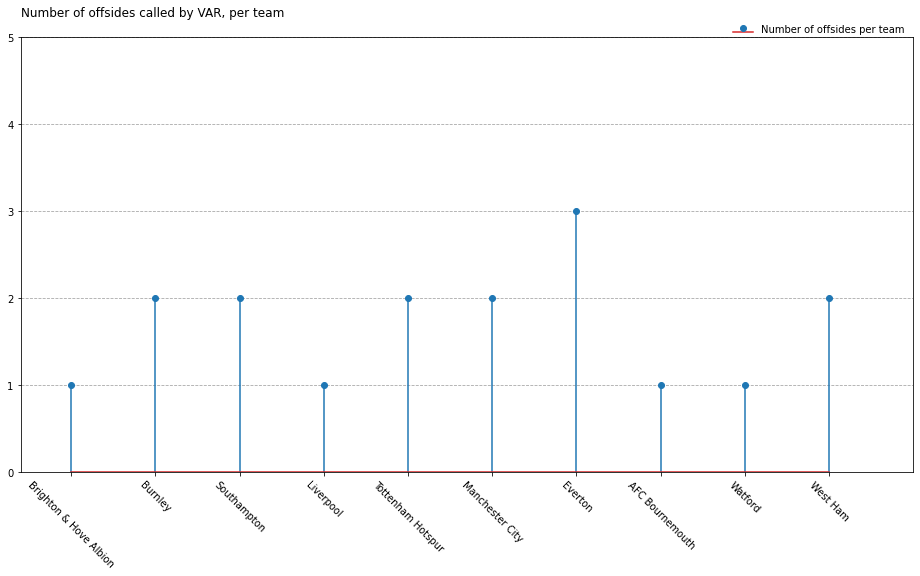

In [8]:
# list with the number of incidents per team
nbr_incidents_per_team = offside.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 10)
plt.ylim(0, 5)

# Decided to go with a stem plot, since it was a nice and clear way to visualise the data
plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = offside['Team']
xlabels = list(dict.fromkeys(labels))


# grid, in order to read the value on y axis in a easier way
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()


## B) Goals ruled out for a foul (by the attacking team)

In [9]:
#Displays goals that have been "ruled out" because of a foul or that have been "disallowed" because of a foul
foul = incidents[incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("foul")|incidents['Incident'].str.contains("disallowed")&incidents['Incident'].str.contains("foul")]
foul

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
1,Brighton & Hove Albion,Aston Villa,Oct. 19,A,conor hourihane goal ruled out for a foul by w...,42nd minute,FOR
17,Manchester United,Liverpool,Jan. 19,A,roberto firmino goal disallowed for foul on da...,25th minute,FOR
18,Manchester United,Chelsea,Feb. 17,A,kurt zouma goal disallowed for foul on brandon...,55th minute,FOR
27,Crystal Palace,Arsenal,Oct. 27,A,sokratis goal disallowed for foul by calum cha...,83rd minute,FOR
75,Leicester City,Burnley,Oct. 21,H,jonny evans own goal ruled out due to a foul b...,80th minute,FOR
207,Norwich City,Chelsea,Aug. 24,H,chelsea goal for kurt zouma disallowed for a f...,77th minute,FOR


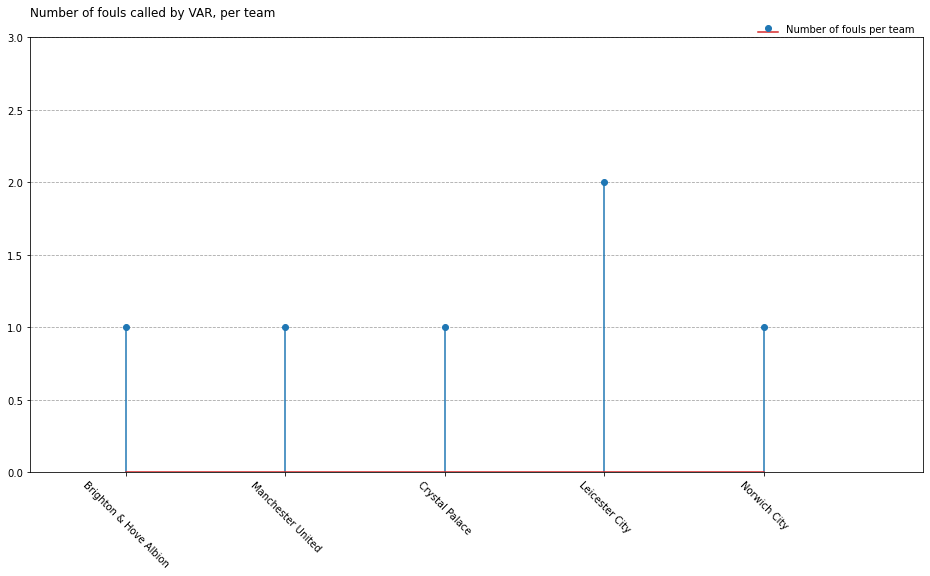

In [10]:
# list with the number of incidents per team
nbr_incidents_per_team = foul.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 5)
plt.ylim(0, 3)

# Decided to go with a stem plot, since it was a nice and clear way to visualise the data
plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = foul['Team']
xlabels = list(dict.fromkeys(labels))


# grid, in order to read the value on y axis in a easier way
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of fouls per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of fouls called by VAR, per team\n', loc='left')
plt.show()

## C) Goals ruled out for a handball (by the attacking team)

In [11]:
handball = incidents[incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("handball")&~incidents['Incident'].str.contains("originally")|incidents['Incident'].str.contains("disallowed")&incidents['Incident'].str.contains("handball")&~incidents['Incident'].str.contains("originally")]
handball
#We added the constraint that the incidents don't include to word "originally" to avoid goals that have been
#given after being ruled out

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
5,Brighton & Hove Albion,Sheffield United,Dec. 21,H,john egan goal ruled out for handball,8th minute,FOR
9,Brighton & Hove Albion,Everton,Jan. 11,A,goal for dominic calvert-lewin ruled out for h...,75th minute,FOR
13,Manchester United,Liverpool,Oct. 20,H,sadio mane goal ruled out for handball,43rd minute,FOR
20,Manchester United,Watford,Feb. 23,H,goal for troy deeney disallowed for handball b...,52nd minute,FOR
43,Burnley,Bournemouth,Feb. 22,H,goal for josh king ruled out for handball in b...,22nd minute,FOR
44,Burnley,Bournemouth,Feb. 22,H,goal for harry wilson ruled out for handball b...,57th minute,FOR
55,Southampton,West Ham,Dec. 14,H,goal for michail antonio ruled out for handball,52nd minute,FOR
71,Liverpool,Man City,July 2,A,city goal for riyad mahrez ruled out for handb...,90th minute,FOR
72,Leicester City,Wolves,Aug. 11,H,wolves goal for leander dendoncker disallowed ...,51st minute,FOR
87,Tottenham Hotspur,Man City,Aug. 17,A,city goal for gabriel jesus ruled out for hand...,90th minute,FOR


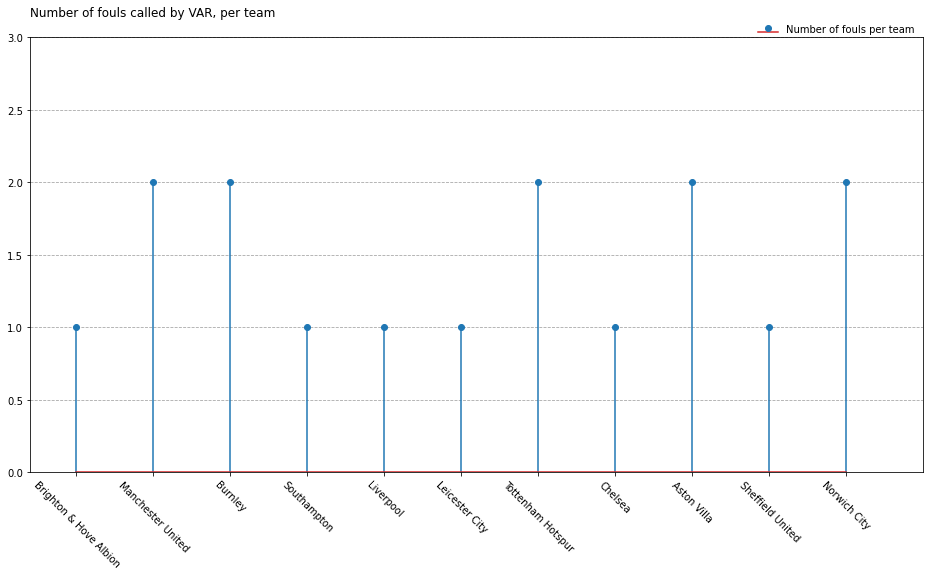

In [12]:
# list with the number of incidents per team
nbr_incidents_per_team = handball.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 11)
plt.ylim(0, 3)

# Decided to go with a stem plot, since it was a nice and clear way to visualise the data
plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = handball['Team']
xlabels = list(dict.fromkeys(labels))


# grid, in order to read the value on y axis in a easier way
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of fouls per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of fouls called by VAR, per team\n', loc='left')
plt.show()

## D) Penalties retaken

In [13]:
#Look for sentences containing the words "penalty" and "retaken"
penalty_retaken = incidents[incidents['Incident'].str.contains("penalty")&incidents['Incident'].str.contains("retaken")]
penalty_retaken

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
3,Brighton & Hove Albion,Leicester,Nov. 23,H,jamie vardy penalty retaken after james maddis...,80th minute,FOR
103,Manchester City,West Ham,Aug. 10,A,missed city penalty retaken due to encroachmen...,86th minute,FOR
107,Manchester City,Wolves,Dec. 27,A,missed city penalty retaken due to encroachmen...,25th minute,FOR
121,Arsenal,Norwich,Dec. 1,A,pierre-emerick aubameyang missed penalty retak...,29th minute,FOR


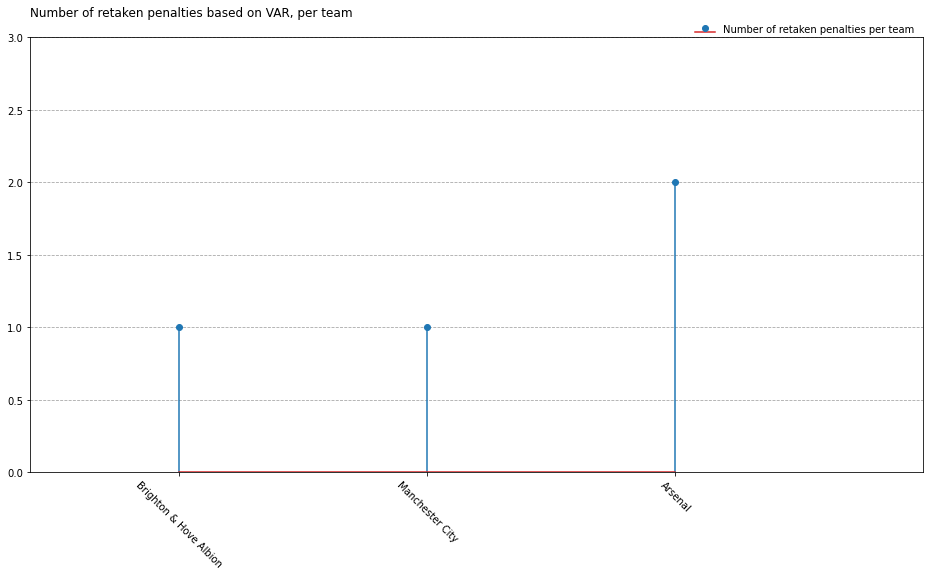

In [14]:
# list with the number of incidents per team
nbr_incidents_per_team = penalty_retaken.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 3)
plt.ylim(0, 3)

# Decided to go with a stem plot, since it was a nice and clear way to visualise the data
plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = penalty_retaken['Team']
xlabels = list(dict.fromkeys(labels))

# grid, in order to read the value on y axis in a easier way
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of retaken penalties per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of retaken penalties based on VAR, per team\n', loc='left')
plt.show()

## E) Goals allowed after being disallowed

In [15]:
#Displays sentences with the words "allowed" and "after", or "given" and "after". 
#This conveniently doesn't show penalties allowed after a referee decision
goal_allowed = incidents[incidents['Incident'].str.contains("allowed") & incidents['Incident'].str.contains("after")|incidents['Incident'].str.contains("given")& incidents['Incident'].str.contains("after")]
goal_allowed

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
10,Brighton & Hove Albion,West Ham,Feb. 1,A,goal for glenn murray allowed after incorrect ...,79th minute,FOR
68,Liverpool,Wolves,Dec. 29,H,goal for sadio mane given after originally rul...,42nd minute,FOR
124,Arsenal,West Ham,March 7,H,alexandre lacazette goal allowed after incorre...,78th minute,FOR


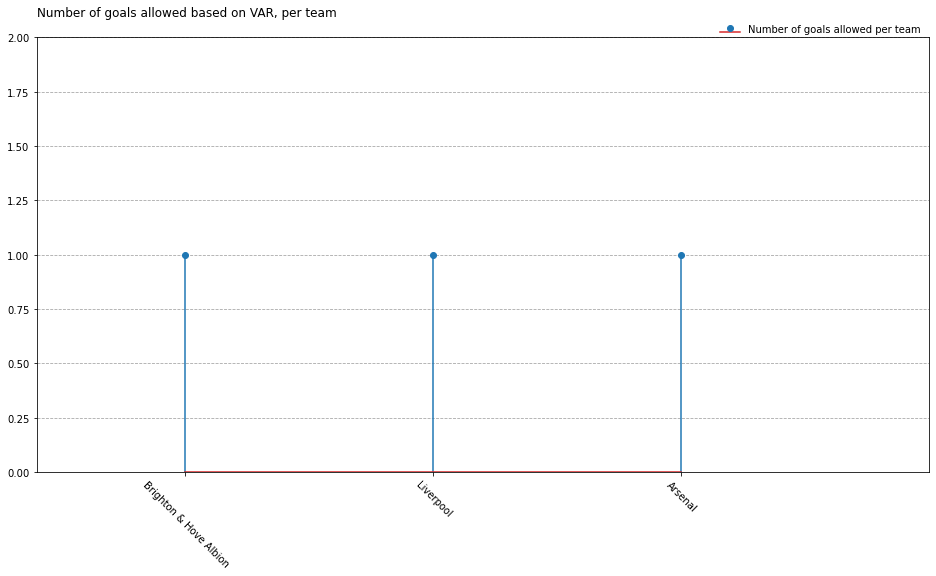

In [16]:
# list with the number of incidents per team
nbr_incidents_per_team = goal_allowed.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 3)
plt.ylim(0, 2)

# Decided to go with a stem plot, since it was a nice and clear way to visualise the data
plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = goal_allowed['Team']
xlabels = list(dict.fromkeys(labels))

# grid, in order to read the value on y axis in a easier way
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of goals allowed per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of goals allowed based on VAR, per team\n', loc='left')
plt.show()

## F) Penalties awarded

In [17]:
#Displays awarded penalties
penalties_awarded = incidents[incidents['Incident'].str.contains("penalty") & incidents['Incident'].str.contains("awarded")]
penalties_awarded

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
2,Brighton & Hove Albion,Everton,Oct. 26,H,penalty awarded (scored by neil maupay) for fo...,78th minute,FOR
14,Manchester United,Norwich,Oct. 27,A,penalty awarded (missed by marcus rashford) fo...,25th minute,FOR
15,Manchester United,Norwich,Oct. 27,A,penalty awarded (missed by anthony martial) fo...,41st minute,FOR
16,Manchester United,Man City,Dec. 7,A,penalty awarded (scored by marcus rashford) fo...,23rd minute,FOR
26,Crystal Palace,Arsenal,Oct. 27,A,penalty awarded for foul by calum chambers on ...,32nd minute,FOR
35,Crystal Palace,Aston Villa,July 12,A,"penalty cancelled, awarded for foul on jack gr...",47th minute,FOR
41,Burnley,Watford,Nov. 23,A,penalty (scored by barnes) awarded for foul on...,80th minute,FOR
44,Burnley,Bournemouth,Feb. 22,H,goal for harry wilson ruled out for handball b...,57th minute,FOR
50,Newcastle,Southampton,March 7,A,penalty awarded for handball by sofiane boufal,40th minute,FOR
62,Southampton,Bournemouth,July 19,A,penalty awarded (missed by danny ings) for han...,57th minute,FOR


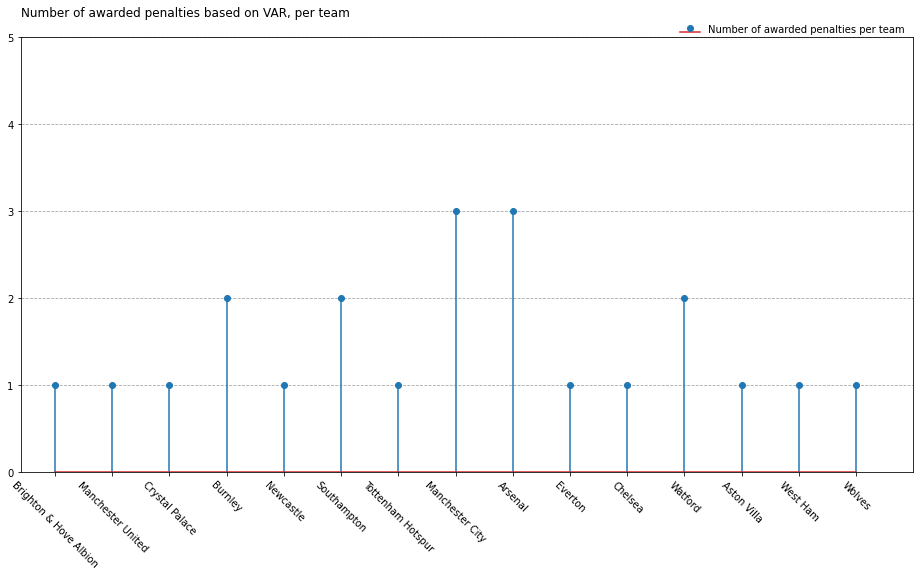

In [18]:
# list with the number of incidents per team
nbr_incidents_per_team = penalties_awarded.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 15)
plt.ylim(0, 5)

# Decided to go with a stem plot, since it was a nice and clear way to visualise the data
plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = penalties_awarded['Team']
xlabels = list(dict.fromkeys(labels))

# grid, in order to read the value on y axis in a easier way
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of awarded penalties per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of awarded penalties based on VAR, per team\n', loc='left')
plt.show()

## G) Penalties cancelled

In [19]:
#Penalties cancelled after the referee's decision to allow it
penalties_cancelled = incidents[incidents['Incident'].str.contains("penalty") & incidents['Incident'].str.contains("cancelled")]
penalties_cancelled

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
32,Crystal Palace,Manchester City,Jan. 18,A,penalty for handball against jairo riedewald c...,72nd minute,FOR
35,Crystal Palace,Aston Villa,July 12,A,"penalty cancelled, awarded for foul on jack gr...",47th minute,FOR
80,Leicester City,Southampton,Jan. 11,H,penalty for southampton cancelled for offside ...,63rd minute,FOR
128,Everton,Leicester,Dec. 1,A,penalty for foul on ben chilwell by mason holg...,34th minute,FOR


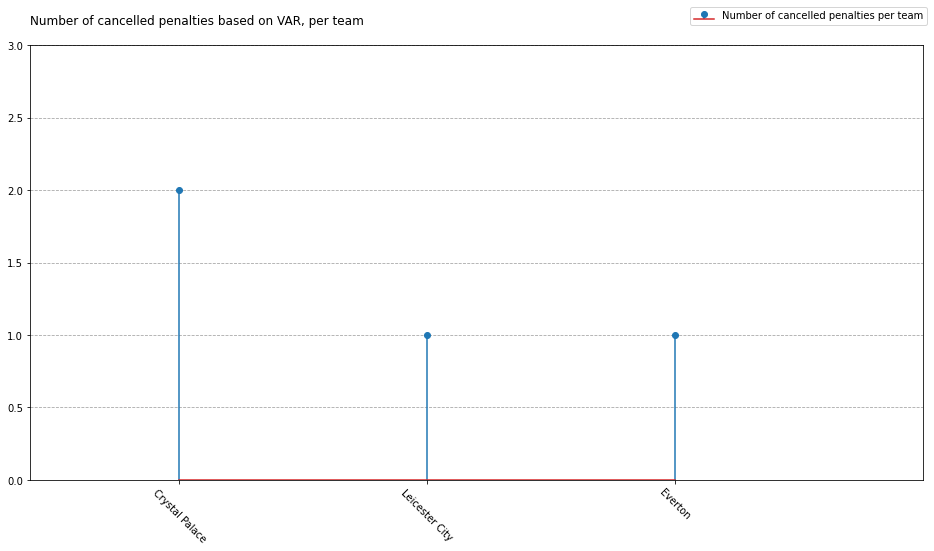

In [20]:
# list with the number of incidents per team
nbr_incidents_per_team = penalties_cancelled.pivot_table(index=['Team'], aggfunc='size');

# Preparing the plot layout
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.xlim(-0.6, 3)
plt.ylim(0, 3)

plt.stem(nbr_incidents_per_team, use_line_collection = True)

# labels for x-tick, in order to have a better view of which team had the most incidents occur
labels = penalties_cancelled['Team']
xlabels = list(dict.fromkeys(labels))

# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(range(0,len(xlabels)),xlabels, rotation=-45);

# title and legend
legend_label = ['Number of cancelled penalties per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1.01, 1.1, 0, 0]), frameon = True)
plt.title('Number of cancelled penalties based on VAR, per team\n', loc='left')
plt.show()

## Representing the data

Find a way of comparing all the previous results


In [21]:
offside_nbr = len(offside[offside == 'VAR used']);
foul_nbr = len(foul[foul == 'VAR used']);
handball_nbr = len(handball[handball == 'VAR used']);
penalty_retaken_nbr = len(penalty_retaken[penalty_retaken == 'VAR used']);
goal_allowed_nbr = len(goal_allowed[goal_allowed == 'VAR used']);
penalties_awarded_nbr = len(penalties_awarded[penalties_awarded == 'VAR used']);
penalties_cancelled_nbr = len(penalties_cancelled[penalties_cancelled == 'VAR used']);

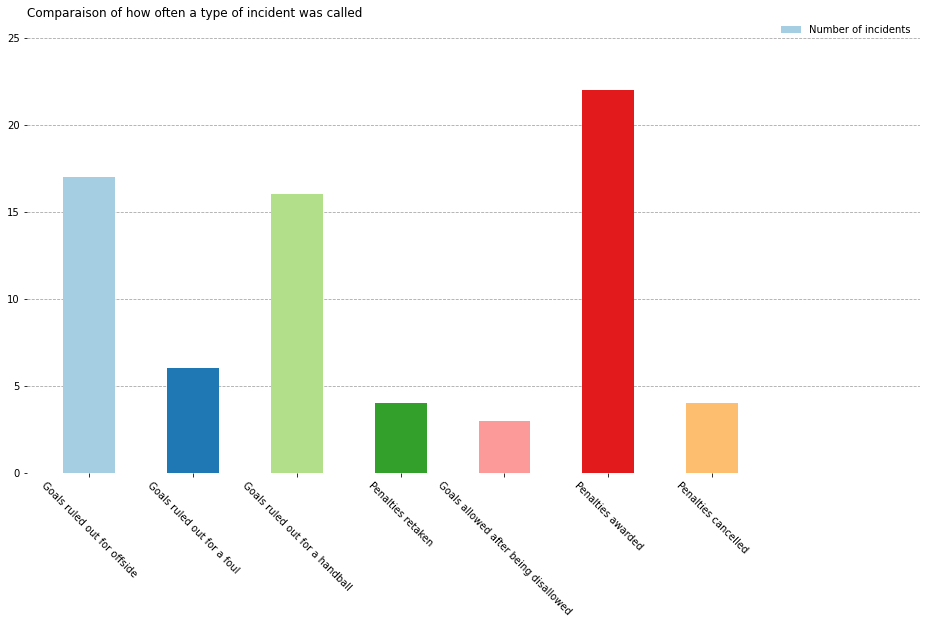

In [32]:
#List
VAR_USED = [offside_nbr,foul_nbr,handball_nbr,penalty_retaken_nbr,goal_allowed_nbr,penalties_awarded_nbr,penalties_cancelled_nbr]

# list to dict
my_dict = {'VAR_USED': VAR_USED}

# dict to df
result_df = pd.DataFrame(my_dict)
result_df


fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(result_df.index, result_df['VAR_USED'], color=plt.cm.Paired(np.arange(len(result_df))), width =0.5)

# x and y limits
plt.xlim(-0.6, 8)
plt.ylim(0, 25)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x ticks
xticks_labels = ['Goals ruled out for offside', 'Goals ruled out for a foul', 'Goals ruled out for a handball', 'Penalties retaken', 'Goals allowed after being disallowed', 'Penalties awarded', 'Penalties cancelled']
plt.xticks(result_df.index , labels = xticks_labels , rotation=-45)

# title and legend
legend_label = ['Number of incidents']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Comparaison of how often a type of incident was called\n', loc='left')
plt.show()

# 2. Is there a gap between the number of overturned decisions for and against each team? 

This second question will be answered using the "VAR_Teams_Stats" dataset. After cleaning it, the number of overturned decisions for and against each team will be analysed and presented in a suitable manner. 
Let's first display a table where the teams will be sorted by the number of overturned decisions in their games, in descending order.

In [23]:
sorted_teams = teams.sort_values("Overturns",ascending=False)
sorted_teams

,Team,Overturns,Leading to goals for,Disallowed goals for,Leading to goals against,Disallowed goals against,Net goal score,Subjective decisions for,Subjective decisions against,Net subjective score
16,West Ham,16,1,5,5,4,-5,2,1,1
9,Manchester City,16,3,4,2,2,-1,4,4,0
7,Leicester City,15,1,3,1,4,1,3,3,0
8,Tottenham Hotspur,15,1,4,1,6,2,3,3,0
5,Southampton,13,0,0,1,7,6,1,4,-3
1,Manchester United,13,1,0,2,7,6,6,2,4
0,Brighton & Hove Albion,12,2,2,0,7,7,2,0,2
12,AFC Bournemouth,12,2,5,1,1,-3,2,4,-2
2,Crystal Palace,12,3,4,0,1,2,6,2,4
13,Chelsea,12,2,4,2,2,-2,4,4,0


In [24]:
sorted_teams['Overturns'].describe()

count    20.00000
mean     10.90000
std       3.49285
min       3.00000
25%       8.75000
50%      11.50000
75%      13.00000
max      16.00000
Name: Overturns, dtype: float64

We can see that the teams that had the most decisions overturned by VAR are West Ham and Manchester City, with 16 overturned decisions, so exactly one overturned decision every 2 games. On the other hand, the team with the least amount of overturned decisions is Newcastle, with only 3 referee decisions corrected by the VAR in the season. 
The average number of overturned decisions per game is 11. The median is really close (11.5) and the standard deviation is 3.5. 
The number of overturned decisions leading to goals for and against each team will now be analysed.

In [25]:
team_decisions = sorted_teams.sort_values("Overturns",ascending=True)
team_decisions = team_decisions.drop(['Overturns', 'Leading to goals for', 'Leading to goals against', 'Disallowed goals for', 'Disallowed goals against', 'Net goal score', 'Net subjective score'], axis = 1)
team_decisions

,Team,Subjective decisions for,Subjective decisions against
4,Newcastle,2,0
14,Watford,1,3
15,Aston Villa,2,3
11,Everton,2,2
6,Liverpool,1,1
10,Arsenal,1,4
18,Wolves,2,1
3,Burnley,4,2
19,Norwich City,1,5
17,Sheffield United,1,2


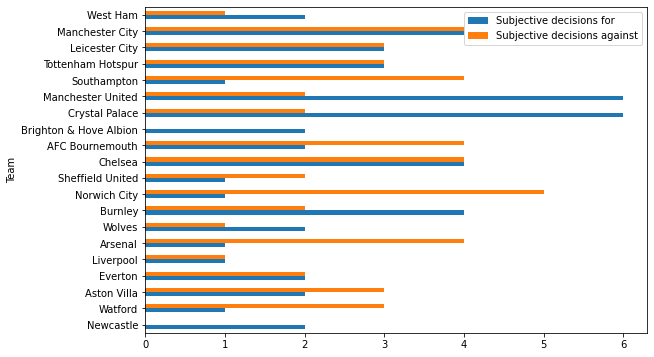

In [26]:
team_decisions.plot.barh('Team', figsize=(9, 6))

In [27]:
team_goals = sorted_teams.sort_values("Overturns",ascending=True)
team_goals = team_goals.drop(['Overturns', 'Subjective decisions for', 'Subjective decisions against', 'Disallowed goals for', 'Disallowed goals against', 'Net goal score', 'Net subjective score'], axis = 1)
team_goals

,Team,Leading to goals for,Leading to goals against
4,Newcastle,1,0
14,Watford,1,2
15,Aston Villa,0,1
11,Everton,2,1
6,Liverpool,1,0
10,Arsenal,4,1
18,Wolves,1,1
3,Burnley,2,1
19,Norwich City,0,2
17,Sheffield United,0,1


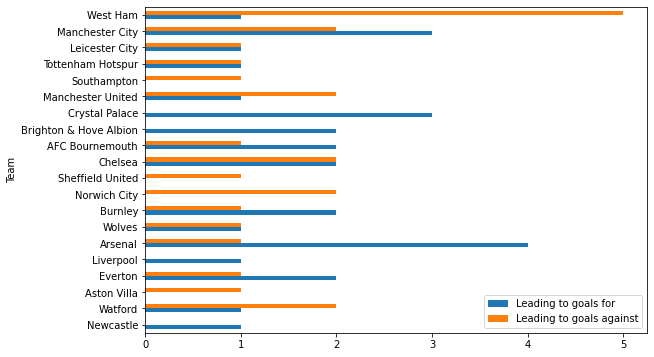

In [28]:
team_goals.plot.barh('Team', figsize=(9, 6))

In [29]:
team_disallowed = sorted_teams.sort_values("Overturns",ascending=True)
team_disallowed = team_disallowed.drop(['Overturns', 'Subjective decisions for', 'Subjective decisions against', 'Leading to goals for', 'Leading to goals against', 'Net goal score', 'Net subjective score'], axis = 1)
team_disallowed

,Team,Disallowed goals for,Disallowed goals against
4,Newcastle,0,0
14,Watford,1,1
15,Aston Villa,3,1
11,Everton,2,1
6,Liverpool,3,4
10,Arsenal,2,0
18,Wolves,4,1
3,Burnley,3,4
19,Norwich City,2,2
17,Sheffield United,5,2


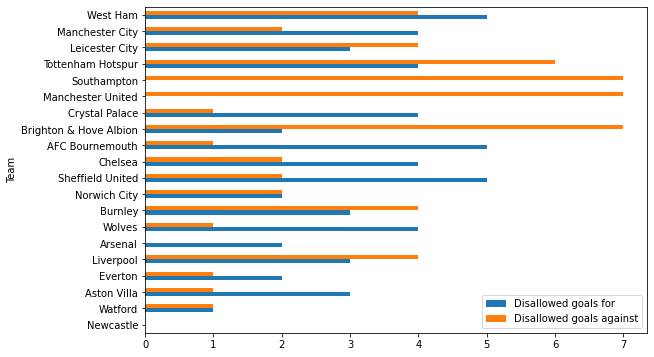

In [30]:
team_disallowed.plot.barh('Team', figsize=(9, 6))

## 3. Is the number of overturned decisions significant? Would the season have been different if these goals were not disallowed?

This question will also be answered using the second dataset (i.e. VAR_Team_Stats). The aim is to analyse the number of goals that were disallowed by the VAR or attributed thanks to it. An alternative league table will then be calculated and compared with the final 2019-20 Premier League table.

In [31]:
#code etc